<a href="https://colab.research.google.com/github/JEEVANnr2001/machine-learning-Projects/blob/main/TotalAsset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from lightgbm import LGBMRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.svm import LinearSVR

In [100]:
df = pd.read_csv("AAPL.csv")

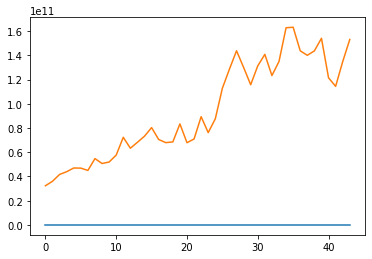

In [136]:
plt.plot(df)

In [101]:
df

,Year,Quarter,TOTAL ASSET
0,2010,Q2,3.233600e+10
1,2010,Q3,3.603300e+10
2,2010,FY,4.167800e+10
3,2011,Q1,4.392700e+10
4,2011,Q2,4.699700e+10
5,2011,Q3,4.689800e+10
6,2011,FY,4.498800e+10
7,2012,Q1,5.477100e+10
8,2012,Q2,5.071200e+10
9,2012,Q3,5.194300e+10


In [102]:
df ['Quarter'] = df ['Quarter'].map({
    'Q1': 1,
    'Q2': 2,
    'Q3': 3,
    'FY': 0
})

In [103]:
df

,Year,Quarter,TOTAL ASSET
0,2010,2,3.233600e+10
1,2010,3,3.603300e+10
2,2010,0,4.167800e+10
3,2011,1,4.392700e+10
4,2011,2,4.699700e+10
5,2011,3,4.689800e+10
6,2011,0,4.498800e+10
7,2012,1,5.477100e+10
8,2012,2,5.071200e+10
9,2012,3,5.194300e+10


In [105]:
# df['Quarter'] = df['Quarter']*.25

In [106]:
df

,Year,Quarter,TOTAL ASSET
0,2010,0.50,3.233600e+10
1,2010,0.75,3.603300e+10
2,2010,0.00,4.167800e+10
3,2011,0.25,4.392700e+10
4,2011,0.50,4.699700e+10
5,2011,0.75,4.689800e+10
6,2011,0.00,4.498800e+10
7,2012,0.25,5.477100e+10
8,2012,0.50,5.071200e+10
9,2012,0.75,5.194300e+10


In [107]:
# df['Year']=df['Year']+df['Quarter']


In [110]:
df = df.drop(['Quarter'],axis=1)

In [111]:
df

,Year,TOTAL ASSET
0,2010.50,3.233600e+10
1,2010.75,3.603300e+10
2,2010.00,4.167800e+10
3,2011.25,4.392700e+10
4,2011.50,4.699700e+10
5,2011.75,4.689800e+10
6,2011.00,4.498800e+10
7,2012.25,5.477100e+10
8,2012.50,5.071200e+10
9,2012.75,5.194300e+10


In [112]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,TOTAL ASSET
Year,1.000000,0.934979
TOTAL ASSET,0.934979,1.000000


In [113]:
X = df['Year'].values
y = df['TOTAL ASSET'].values
# X = X.reshape(1,-1)
# y = y.reshape(1,-1)
print(X.shape)
print(y)

(44,)
[3.23360e+10 3.60330e+10 4.16780e+10 4.39270e+10 4.69970e+10 4.68980e+10
 4.49880e+10 5.47710e+10 5.07120e+10 5.19430e+10 5.76530e+10 7.23480e+10
 6.33370e+10 6.82190e+10 7.32860e+10 8.03470e+10 7.05410e+10 6.79490e+10
 6.85310e+10 8.34030e+10 6.78910e+10 7.09530e+10 8.93780e+10 7.62190e+10
 8.75920e+10 1.12875e+11 1.28645e+11 1.43810e+11 1.30053e+11 1.15761e+11
 1.31339e+11 1.40828e+11 1.23346e+11 1.34973e+11 1.62819e+11 1.63231e+11
 1.43753e+11 1.40065e+11 1.43713e+11 1.54106e+11 1.21465e+11 1.14423e+11
 1.34836e+11 1.53154e+11]


In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state = 40
)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [115]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
train_score = model.score(X_train, y_train)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
test_score = model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.8546911065815802
Test Score: 0.9187931474648502


In [142]:
import math
y_pred = model.predict(X.reshape(-1,1))
def compute_mse(model, y_pred, y_true, name):
    
    mse = mean_squared_error(y_true, y_pred)
   
    print(f'Mean Squared Error for {name}: {mse}')
    
compute_mse(model, X_train, y_train, 'training set')
compute_mse(model, X_test, y_test, 'test set')

Mean Squared Error for training set: 9.700749669623528e+21
Mean Squared Error for test set: 1.208731364620509e+22


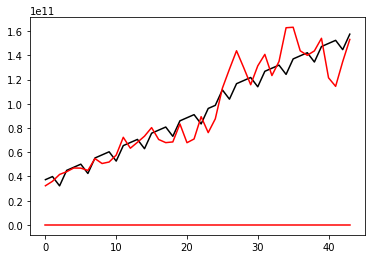

In [150]:
plt.plot(y_pred,'black')
plt.plot(df,'red')

In [1]:
y_pr = []

for i in range(2022.5,2024.0):
  
  y_pr.append(model.predict([[i]]))
  i = i+0.25

TypeError: ignored

In [123]:
from sklearn.svm import LinearSVR

In [125]:
model2 = LinearSVR()
model2.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR()

In [156]:
y_pred2 = model2.predict(X.reshape(-1,1))
y_pred2

array([1.21569436e+08, 1.21584553e+08, 1.21539202e+08, 1.21614787e+08,
       1.21629903e+08, 1.21645020e+08, 1.21599670e+08, 1.21675254e+08,
       1.21690371e+08, 1.21705487e+08, 1.21660137e+08, 1.21735721e+08,
       1.21750838e+08, 1.21765955e+08, 1.21720604e+08, 1.21796188e+08,
       1.21811305e+08, 1.21826422e+08, 1.21781072e+08, 1.21856656e+08,
       1.21871772e+08, 1.21886889e+08, 1.21841539e+08, 1.21917123e+08,
       1.21932240e+08, 1.22007824e+08, 1.21962473e+08, 1.22038057e+08,
       1.22053174e+08, 1.22068291e+08, 1.22022940e+08, 1.22098525e+08,
       1.22113641e+08, 1.22128758e+08, 1.22083408e+08, 1.22158992e+08,
       1.22174109e+08, 1.22189225e+08, 1.22143875e+08, 1.22219459e+08,
       1.22234576e+08, 1.22249693e+08, 1.22204342e+08, 1.22279926e+08])

In [152]:
def build_evaluate_fn(X_train, y_train, X_test, y_test):
    def evaluate(model2):
        train_score = model2.score(X_train, y_train)
        test_score = model2.score(X_test, y_test)

        print("Train Score:", train_score)
        print("Test Score:", test_score)
        print()
        
        compute_mse(model2, X_train, y_train, 'training set')
        compute_mse(model2, X_test, y_test, 'test set')
    
    return evaluate

evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)

In [153]:

evaluate(model2)

Train Score: -4.5885479073517015
Test Score: -9.345508372002536

Mean Squared Error for training set: 9.700749669623528e+21
Mean Squared Error for test set: 1.208731364620509e+22


In [154]:
model2.predict([[2014]])

array([1.21781072e+08])

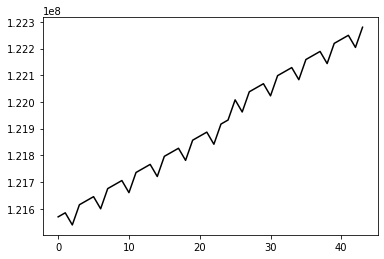

In [157]:
plt.plot(y_pred2,'black')
